# Homework 2: CS 273A, Machine Learning: Fall 2020
*by Marzhan Bekbalanova*

# Problem 1: Linear Regression (60 points)


For this problem we will explore linear regression, the creation of additional features, and cross-validation

1. Load the “data/curve80.txt” data set, and split it into 75% / 25% training/test

In [234]:
import numpy as np 
import mltools as ml
import matplotlib.pyplot as plt

data = np.genfromtxt("data/curve80.txt", delimiter = None)

In [235]:
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25


Print the shapes of these four objects. (5 points)


In [236]:
Xtr.shape

(60, 1)

In [237]:
Xte.shape

(20, 1)

In [238]:
Ytr.shape

(60,)

In [239]:
Yte.shape

(20,)

2. Use the provided linearRegress class to create a linear regression predictor of y given x. You
can plot the resulting function by simply evaluating the model at a large number of x values, xs:

In [241]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs ) # make predictions at xs

(a) Plot the training data points along with your prediction function in a single plot. (10 points)

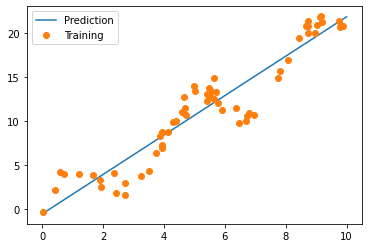

In [242]:
f, ax = plt.subplots(1, 1)

ax.plot(xs, ys, label='Prediction')
ax.plot(Xtr, Ytr, 'o', label='Training')
ax.legend(fontsize=10, loc=0)

plt.show()

(b) Print the linear regression coefficients (lr.theta) and verify that they match your plot. (5
points)

In [243]:
print('Coefficients: \n', lr.theta)

Coefficients: 
 [[-0.57031638  2.24712623]]


Yes, they match

(c) What is the mean squared error of the predictions on the training and test data? (10 points)

In [244]:
from sklearn.metrics import mean_squared_error
predTe = lr.predict( Xte ) 
predTr = lr.predict( Xtr) 

mseTe = mean_squared_error(Yte, predTe)
mseTr = mean_squared_error(Ytr, predTr)

print("Mean Squared Error on test data: ", mseTe)
print("Mean Squared Error on training data: ", mseTr)

Mean Squared Error on test data:  6.444015054865527
Mean Squared Error on training data:  4.423558975566155


3. Try fitting y = f(x) using a polynomial function f(x) of increasing order. Do this by the trick of
adding additional polynomial features before constructing and training the linear regression object.
You can do this easily yourself; you can add a quadratic feature of Xtr with


In [245]:
Xtr2 = np.zeros( (Xtr.shape[0],2) ) # create Mx2 array to store features
Xtr2[:,0] = Xtr[:,0] # place original "x" feature as X1
Xtr2[:,1] = Xtr[:,0]**2 # place "xˆ2" feature as X2
# Now, Xtr2 has two features about each data point: "x" and "xˆ2"

Train models of degree d = 1, 3, 5, 7, 10, 18 and:

(a) plot their learned prediction functions f(x) (15 points)

In [248]:
def polyPred(degree):
    XtrP = ml.transforms.fpoly(Xtr, degree, False)
    lr = ml.linear.linearRegress(XtrP, Ytr)

    xd = np.linspace(0, 10, 200)
    xd = np.atleast_2d(xd).T

    xdP = ml.transforms.fpoly(xd, degree, False)
    ys = lr.predict(xdP)
    f, ax = plt.subplots(1, 1)
    
    ax.scatter(Xtr, Ytr, color='blue', alpha=0.75, label='Train')
    ax.scatter(Xte, Yte, color='red', alpha=0.75, label='Test')

    # Also plotting the regression line. in the plotting we plot the xs and not the xsP
    ax.plot(xd, ys, color='black', label='Prediction')

    ax.set_xlim(-0.2, 10)
    ax.set_ylim(0, 30)
 
    ax.legend(fontsize=10, loc=0)
    plt.title('degree= {}'.format(degree))
    plt.show()

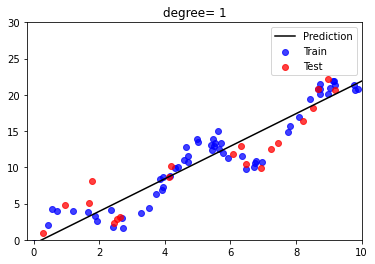

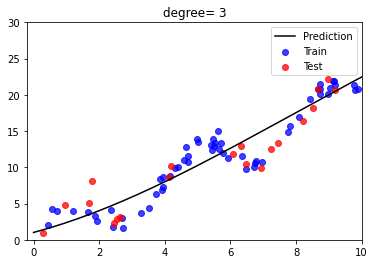

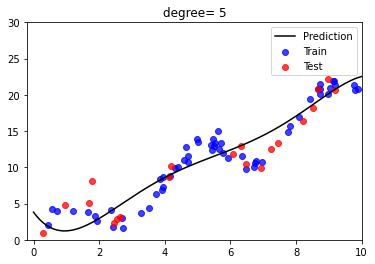

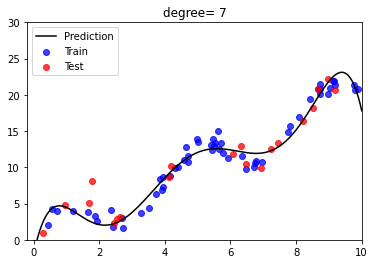

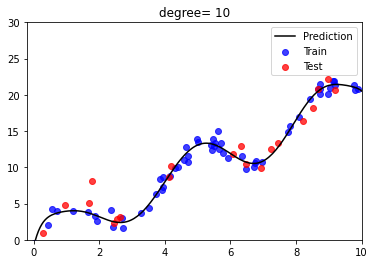

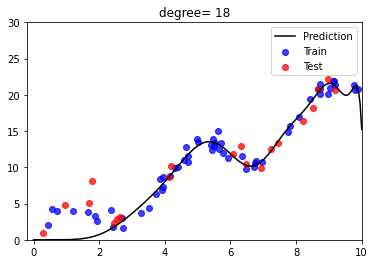

In [249]:
degrees = np.array([1, 3, 5, 7, 10, 18])

for i, degree in enumerate(degrees):
    polyPred(degree)

(b) plot their training and test errors on a log scale (semilogy) as a function of the degree. (10
points)

In [250]:
degrees = np.array([1, 3, 5, 7, 10, 18])
mse_errorTe = np.zeros(degrees.shape[0])
mse_errorTr = np.zeros(degrees.shape[0])

for i, degree in enumerate(degrees):
    XtrP = ml.transforms.fpoly(Xtr, degree, False)
    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP = ml.transforms.fpoly(Xte, degree, False)
    YteHat = lr.predict(XteP)
    YtrHat = lr.predict(XtrP)
    mse_errorTe[i] = mean_squared_error(Yte, YteHat)
    mse_errorTr[i] = mean_squared_error(Ytr, YtrHat)
    #print("Degree-"+str(degree)+" polynomial MSE: " + str(mse_errorTe[i])+ " "+ str(mse_errorTr[i]))

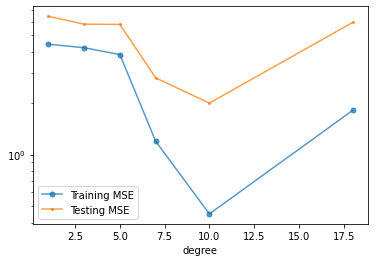

In [251]:
f, ax = plt.subplots(1, 1)

# Plotting a line with markers where there's an actual x value.
ax.semilogy(degrees, mse_errorTr, marker='o', markersize=5, alpha=0.75, label='Training MSE')
ax.semilogy(degrees, mse_errorTe, marker='o', markersize=2, alpha=0.75, label='Testing MSE')

plt.xlabel("degree")
ax.legend(fontsize=10, loc=0)

plt.show()

(c) What polynomial degree do you recommend? (5 points)

The polynomial degrees between 7 and 13 are good. Polynomial degree=10 gives us the best results. If the degree is too low, the MSE increases and if the degree is too high the MSE increases due to overfitting

# Problem 2: Cross-validation (35 points)


In [252]:
nFolds = 5;
J = val_error = np.zeros(5)

for iFold in range(nFolds):
    Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation
    learner = ml.linear.linearRegress(Xti, Yti) # TODO: train on Xti, Yti, the data for this fold
    #mse_errorTe[i] = mean_squared_error(Yte, YteHat)
    YteHat = lr.predict(XteP)
    YtrHat = lr.predict(XtrP)
    J[iFold] = mean_squared_error(Xvi, Yvi) # TODO: now compute the MSE on Xvi, Yvi and save it
    # the overall estimated validation error is the average of the error on each fold
print(np.mean(J))


53.4345656107068


1. Plot the five-fold cross-validation error and test error (with semilogy, as before) as a function of
degree. (10 points)

In [258]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

degrees = np.array([1, 3, 5, 7, 10, 18])
val_error = np.zeros(degrees.shape[0])
crossvalidation = KFold(n_splits=5)
lm = skl_lm.LinearRegression()
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, Y)
    scores = cross_val_score(model, X_current, Y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
    val_error[i] =np.mean(np.abs(scores))
    print("Degree="+str(degree)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree=1 polynomial MSE: 5.119772068619383, STD: 0.8550298832074477
Degree=3 polynomial MSE: 4.943429901176849, STD: 0.6346693517907287
Degree=5 polynomial MSE: 5.131285951231762, STD: 1.1328935999248804
Degree=7 polynomial MSE: 2.5500261375808204, STD: 1.6302919800116011
Degree=10 polynomial MSE: 1.0303402441763325, STD: 0.4414429475474998
Degree=18 polynomial MSE: 1.531874986635968, STD: 0.8664506027029855


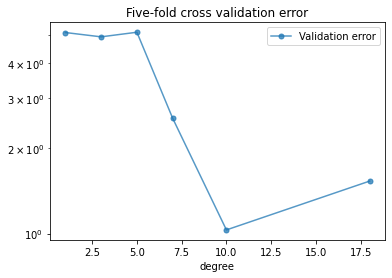

In [254]:
f, ax = plt.subplots(1, 1)

# Plotting a line with markers where there's an actual x value.
ax.semilogy(degrees, val_error, marker='o', markersize=5, alpha=0.75, label='Validation error')
plt.xlabel("degree")
ax.legend(fontsize=10, loc=0)
plt.title("Five-fold cross validation error")
plt.show()

2. How do the MSE estimates from five-fold cross-validation compare to the MSEs evaluated on the
actual test data (Problem 1)? (5 points)

The MSE evaluated on the actual test data was equal to MSE =~ 6.44. However, with 5 fold cross validation we got as low as 1.03 when polynomial degree = 10, and as high as 5.11 with the polynomial degree = 1. We observe that 5-fold cross validation outperforms the regular 75/25 training/testing split and gives better results for the given dataset.


3. Which polynomial degree do you recommend based on five-fold cross-validation error? (5 points)


Polynomial degrees between 10 and 18 give pretty low MSE errors,degree = 10 being the best one and therefore are recommended. But not lower or higher

4. For the degree that you picked in step 3, plot the cross-validation error as the number of folds is varied
(nFolds = 2, 3, 4, 5, 6, 10, 12, 15), again with semilogy. What pattern do you observe, and how do
you explain it? (15 points)

In [259]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm
degree = 10
nFolds = np.array([2, 3, 4, 5, 6, 10, 12, 15])
val_error = np.zeros(nFolds.shape[0])
lm = skl_lm.LinearRegression()
for i, n in enumerate(nFolds):
    crossvalidation = KFold(n_splits=n)
    poly = PolynomialFeatures(degree)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, Y)
    scores = cross_val_score(model, X_current, Y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
    val_error[i] =np.mean(np.abs(scores))
    print("For nFold="+str(n)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

For nFold=2 polynomial MSE: 1.3417875740828449, STD: 0.40629652320296905
For nFold=3 polynomial MSE: 0.9823495512767147, STD: 0.4011583508628499
For nFold=4 polynomial MSE: 1.1338960079540534, STD: 0.5029265132681084
For nFold=5 polynomial MSE: 1.0303402441763325, STD: 0.4414429475474998
For nFold=6 polynomial MSE: 0.9843974324070488, STD: 0.6003710969979471
For nFold=10 polynomial MSE: 1.0781132537031963, STD: 0.7636502416774286
For nFold=12 polynomial MSE: 1.068705115136366, STD: 0.9670840811757235
For nFold=15 polynomial MSE: 1.0720352191127702, STD: 0.9604182081503911


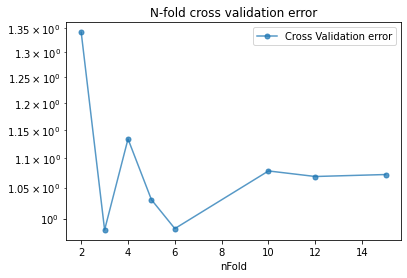

In [260]:
f, ax = plt.subplots(1, 1)
nFolds = np.array([2, 3, 4, 5, 6, 10, 12, 15])

# Plotting a line with markers where there's an actual x value.
ax.semilogy(nFolds, val_error, marker='o', markersize=5, alpha=0.75, label='Cross Validation error')
plt.xlabel("nFold")
ax.legend(fontsize=10, loc=0)
plt.title("N-fold cross validation error")
plt.show()

The interesting pattern is that MSE decreases at the beginning and at nfold = 6 we get the lowest validation error but as we increase the number of folds it does the opposite - harming our MSE because now when we have too many folds the training size becomes smaller for each fold making the training not as efficient

# Statement of Collaboration

I, Marzhan Bekbalanova, am the only person who worked on this homework. I discussed the general trends of the curves of the polynomial function with Ekaterina Deyneka. 

Thank you! Have a nice day

In [261]:
from sklearn.model_selection import KFold

def mse_cost(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

def compute_CV_error(model, Xtr, Ytr):
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(Xtr):
        # split the data
        split_X_train, split_X_valid = Xtr[train_idx], Xtr[valid_idx]
        split_Y_train, split_Y_valid = Ytr.iloc[train_idx], Ytr.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train,split_Y_train)
        
        # Compute the RMSE on the validation split
        error = mse_cost(split_Y_valid,model.predict(split_X_valid))
        test_error = mse_cost(best_model.predict(best_trans.transform(X_test)), y_test)

        validation_errors.append(error)
    
    #average validation errors
    return np.mean(validation_errors)

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# First, we add polynomial features to X_train
transformers = [PolynomialFeatures(degree=deg)
                for deg in range(1, 11)]
X_train_polys = [transformer.fit_transform(Xtr)
                 for transformer in transformers]

# Display the X_train with degree 5 polynomial features
X_train_polys[4]

array([[1.00000000e+00, 9.18163921e+00, 8.43024987e+01, 7.74035128e+02,
        7.10691128e+03, 6.52530953e+04],
       [1.00000000e+00, 9.79891114e+00, 9.60186595e+01, 9.40878312e+02,
        9.21958297e+03, 9.03418743e+04],
       [1.00000000e+00, 6.73852384e+00, 4.54077035e+01, 3.05980893e+02,
        2.06185954e+03, 1.38938897e+04],
       [1.00000000e+00, 7.81272494e+00, 6.10386709e+01, 4.76878346e+02,
        3.72571935e+03, 2.91080204e+04],
       [1.00000000e+00, 4.40684931e+00, 1.94203208e+01, 8.55824274e+01,
        3.77148861e+02, 1.66203820e+03],
       [1.00000000e+00, 7.74971136e+00, 6.00580261e+01, 4.65432367e+02,
        3.60696650e+03, 2.79529492e+04],
       [1.00000000e+00, 2.73309854e+00, 7.46982763e+00, 2.04157750e+01,
        5.57983249e+01, 1.52502320e+02],
       [1.00000000e+00, 5.77881184e+00, 3.33946662e+01, 1.92981493e+02,
        1.11520373e+03, 6.44455253e+03],
       [1.00000000e+00, 8.73690533e+00, 7.63335148e+01, 6.66918692e+02,
        5.82680548e+03, 

In [265]:
cross_validation_errors = [compute_CV_error(LinearRegression(fit_intercept=False), X_train_poly, Ytr)
                     for X_train_poly in X_train_polys]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'